In [11]:
from utils import *
from analysis import *
import multiprocessing as mp
import pathlib
from tqdm.notebook import tqdm
import gc

fig_dir = pathlib.Path(".")/"figs"


# Probability Distributions

We expect distributions of the form 
$$
\begin{aligned}
    P(S = s) &= s^{1-\tau} \\
    P(T = t) &= s^{1-\alpha} \\
    P(R = r) &= s^{1-\lambda}
\end{aligned}
$$

# 2D Grid comparison
Compare on the 2D grid the different parameters of the systems.

  0%|          | 0/10 [00:00<?, ?it/s]

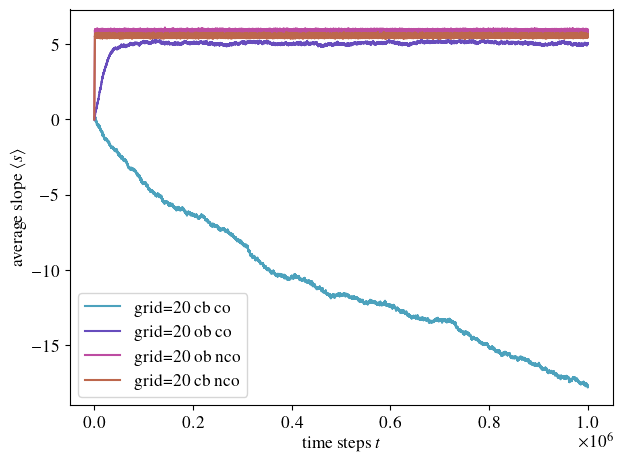

In [2]:

files = list(pathlib.Path(".").parent.glob("data/data_2*"))
# lock = mp.Lock()

plt.figure("2d_comparison")
for file in tqdm(files):
    if "20" not in file.name:
        continue
    system = SandpileND.load_from_file(file.absolute())
    params = file.name.split("_")

    b = params[3] + "b"
    p = "co" if params[4] == "c" else "nco"

    draw_slope(system, label=f"grid={system.linear_grid_size} {b} {p}")
    del system
    gc.collect()

plt.legend()
plt.savefig(fig_dir/"2d_comparison.png", bbox_inches="tight", dpi=300)


# Comparison of grid sizes

  0%|          | 0/5 [00:00<?, ?it/s]

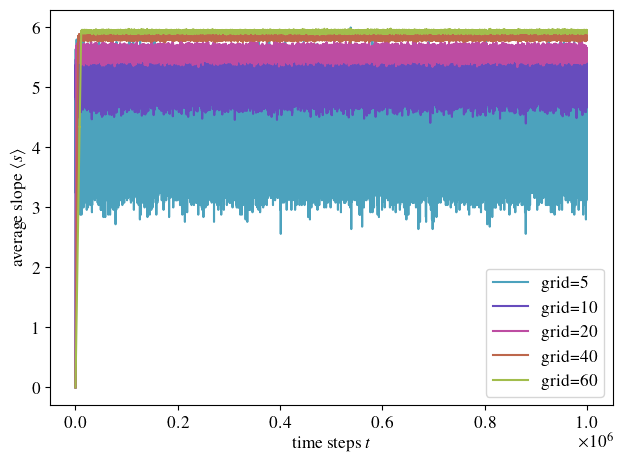

In [16]:
grid_sizes = [5, 10, 20, 40, 60]

plt.figure("2d_grid_comparison")
for grid in tqdm(grid_sizes):
    system = SandpileND.load_from_file(f"data/data_2_{grid}_c_n_7")
    draw_slope(system, label=f"grid={grid}")

    del system

plt.legend()
plt.savefig(fig_dir/"2d_grid_comparison.png", bbox_inches="tight", dpi=300)


# Calculate the scaling exponents


1406.3125